In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#use the citipy module to determine city based on latitude and longitude
from citipy import citipy
#import the datetime module from the datetime library
from datetime import datetime
#for API requests
import requests
#import the API key
from config import weather_api_key
# Import the time module.
import time
# Import linear regression from the SciPy stats module
from scipy.stats import linregress

In [2]:
#create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
#add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
#create a list for holding the cities
cities = []
#identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#print the city count to confirm sufficient count
len(cities)

621

In [5]:
# Starting URL for Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid="+weather_api_key

In [6]:
#create an empty list to hold the weather data
city_data = []
#print the start of logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#initializee counters
record_count = 1
set_count = 1

#loop through all the cities in the list
for i, city in enumerate(cities):

    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #create endpoint URL with each city
    city_url = url + "&q=" + city

    #log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #add 1 to the record count
    record_count += 1
    
    #run an API request for each of the cities
    try:
        #parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#if an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sopot
Processing Record 2 of Set 1 | mancio lima
Processing Record 3 of Set 1 | faanui
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | westport
Processing Record 8 of Set 1 | bria
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | port hedland
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | bemidji
Processing Record 13 of Set 1 | coromandel
Processing Record 14 of Set 1 | durban
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | presidencia roque saenz pena
Processing Record 17 of Set 1 | vallenar
Processing Record 18 of Set 1 | praia
Processing Record 19 of Set 1 | les cayes
Processing Record 20 of Set 1 | luderitz
Processing Record 21 of Set 1 | vanimo
Processing Record 22 of Set 1 | albany
Processing Record 23 of Set 1 

Processing Record 39 of Set 4 | smithers
Processing Record 40 of Set 4 | san patricio
Processing Record 41 of Set 4 | grindavik
Processing Record 42 of Set 4 | ugoofaaru
Processing Record 43 of Set 4 | cidreira
Processing Record 44 of Set 4 | mabaruma
Processing Record 45 of Set 4 | portland
Processing Record 46 of Set 4 | harer
Processing Record 47 of Set 4 | taoudenni
Processing Record 48 of Set 4 | marcona
City not found. Skipping...
Processing Record 49 of Set 4 | ayan
Processing Record 50 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 1 of Set 5 | xuddur
Processing Record 2 of Set 5 | shymkent
Processing Record 3 of Set 5 | halmstad
Processing Record 4 of Set 5 | zhigansk
Processing Record 5 of Set 5 | maamba
Processing Record 6 of Set 5 | conde
Processing Record 7 of Set 5 | grand gaube
Processing Record 8 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 9 of Set 5 | bar harbor
Processing Record 10 of Set 5 | sibolga
Processing Record 11 of Set 5 | cho

Processing Record 30 of Set 8 | aripuana
Processing Record 31 of Set 8 | north branch
Processing Record 32 of Set 8 | noumea
Processing Record 33 of Set 8 | luwingu
Processing Record 34 of Set 8 | kahului
Processing Record 35 of Set 8 | samana
Processing Record 36 of Set 8 | qui nhon
Processing Record 37 of Set 8 | grand centre
City not found. Skipping...
Processing Record 38 of Set 8 | port keats
Processing Record 39 of Set 8 | shache
Processing Record 40 of Set 8 | humaita
Processing Record 41 of Set 8 | necochea
Processing Record 42 of Set 8 | southbridge
Processing Record 43 of Set 8 | vanavara
Processing Record 44 of Set 8 | proletarsk
Processing Record 45 of Set 8 | mahebourg
Processing Record 46 of Set 8 | srednekolymsk
Processing Record 47 of Set 8 | west wendover
Processing Record 48 of Set 8 | port lincoln
Processing Record 49 of Set 8 | rundu
Processing Record 50 of Set 8 | dunedin
Processing Record 1 of Set 9 | acari
Processing Record 2 of Set 9 | urfa
City not found. Skipp

Processing Record 15 of Set 12 | alikalia
Processing Record 16 of Set 12 | talnakh
Processing Record 17 of Set 12 | santa cruz
Processing Record 18 of Set 12 | santa maria
Processing Record 19 of Set 12 | kazachinskoye
Processing Record 20 of Set 12 | hyeres
Processing Record 21 of Set 12 | esperance
Processing Record 22 of Set 12 | birao
Processing Record 23 of Set 12 | kembaran
Processing Record 24 of Set 12 | vasilyevskiy mokh
Processing Record 25 of Set 12 | olafsvik
Processing Record 26 of Set 12 | veraval
Processing Record 27 of Set 12 | warrnambool
Processing Record 28 of Set 12 | grebenskaya
Processing Record 29 of Set 12 | kyabe
Processing Record 30 of Set 12 | muhos
Processing Record 31 of Set 12 | bontang
Processing Record 32 of Set 12 | patiya
Processing Record 33 of Set 12 | apac
Processing Record 34 of Set 12 | elat
Processing Record 35 of Set 12 | hay river
Processing Record 36 of Set 12 | pringsewu
Processing Record 37 of Set 12 | trairi
Processing Record 38 of Set 12 |

In [7]:
len(city_data)

574

In [8]:
#convert the array of dictionaries to a dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sopot,54.44,18.56,36.00,86,0,3.36,PL,2020-04-19 01:19:50
1,Mancio Lima,-7.61,-72.90,70.99,75,21,2.08,BR,2020-04-19 01:19:50
2,Faanui,-16.48,-151.75,82.78,74,25,10.63,PF,2020-04-19 01:09:40
3,Bredasdorp,-34.53,20.04,46.40,93,68,3.36,ZA,2020-04-19 01:09:26
4,Punta Arenas,-53.15,-70.92,46.40,65,40,19.46,CL,2020-04-19 01:08:30
5,Qaanaaq,77.48,-69.36,21.69,88,100,19.26,GL,2020-04-19 01:13:17
6,Westport,41.14,-73.36,42.80,75,90,6.93,US,2020-04-19 01:09:26
7,Bria,6.54,21.99,74.59,58,50,3.67,CF,2020-04-19 01:19:53
8,Rikitea,-23.12,-134.97,77.41,70,42,5.93,PF,2020-04-19 01:10:13
9,Port Hedland,-20.32,118.57,87.80,66,83,8.05,AU,2020-04-19 01:19:55


In [9]:
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sopot,PL,2020-04-19 01:19:50,54.44,18.56,36.00,86,0,3.36
1,Mancio Lima,BR,2020-04-19 01:19:50,-7.61,-72.90,70.99,75,21,2.08
2,Faanui,PF,2020-04-19 01:09:40,-16.48,-151.75,82.78,74,25,10.63
3,Bredasdorp,ZA,2020-04-19 01:09:26,-34.53,20.04,46.40,93,68,3.36
4,Punta Arenas,CL,2020-04-19 01:08:30,-53.15,-70.92,46.40,65,40,19.46
...,...,...,...,...,...,...,...,...,...
569,Boa Vista,BR,2020-04-19 01:19:43,2.82,-60.67,77.00,73,75,13.87
570,Lobito,AO,2020-04-19 01:24:37,-12.35,13.55,78.24,86,91,4.61
571,Hirara,JP,2020-04-19 01:24:37,24.80,125.28,78.80,83,75,18.34
572,Aleksandrov Gay,RU,2020-04-19 01:24:38,50.15,48.57,40.26,80,17,5.32


In [10]:
#create the output file (CSV)
output_data_file = "weather_data/cities.csv"
#export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
#extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

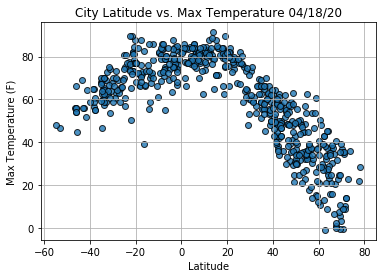

In [12]:
#build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig1.png")

#show plot
plt.show()

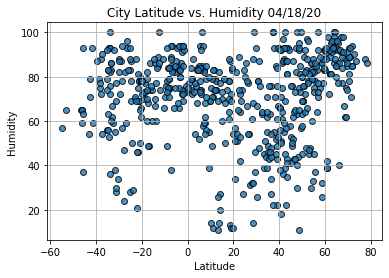

In [13]:
#build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig2.png")

#show plot
plt.show()

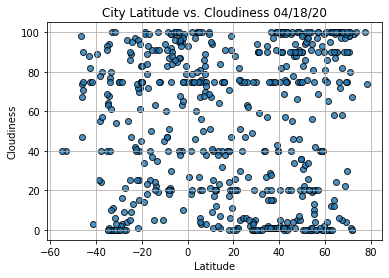

In [14]:
#build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig3.png")

#show plot
plt.show()

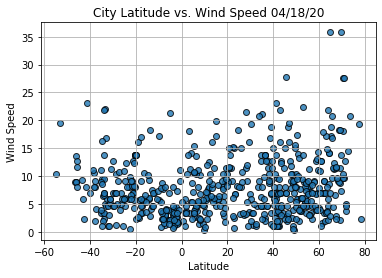

In [15]:
#build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig4.png")

#show plot
plt.show()

In [16]:
#perform linear regression to predict max_temp for lat 
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)
#get the equation of the line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

#calculate regression line "y values" from the slope and intercept and create new list
regress_values = [(lat * slope + intercept) for lat in lats]

y = -0.42x + 67.02
The p-value is: 0.000


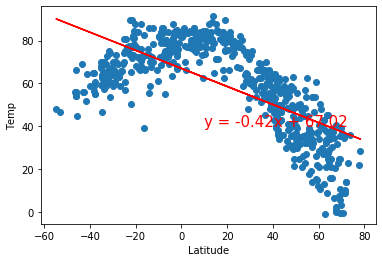

In [17]:
#create a scatter plot of latitues and max_temps
plt.scatter(lats,max_temps)
#plot regression line with latitues (x axis) and predicted max_temps (regress_values) as y axis, and color red
plt.plot(lats,regress_values,"r")
#annotate with line equation as text, add coordinates, axes titles, and color red
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [18]:
index_13=city_data_df.loc[13]
index_13


City                       Durban
Country                        ZA
Date          2020-04-19 01:16:04
Lat                        -29.86
Lng                         31.03
Max Temp                     69.8
Humidity                       88
Cloudiness                     75
Wind Speed                   6.93
Name: 13, dtype: object

In [19]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4      False
       ...  
569     True
570    False
571     True
572     True
573    False
Name: Lat, Length: 574, dtype: bool

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sopot,PL,2020-04-19 01:19:50,54.44,18.56,36.00,86,0,3.36
5,Qaanaaq,GL,2020-04-19 01:13:17,77.48,-69.36,21.69,88,100,19.26
6,Westport,US,2020-04-19 01:09:26,41.14,-73.36,42.80,75,90,6.93
7,Bria,CF,2020-04-19 01:19:53,6.54,21.99,74.59,58,50,3.67
11,Bemidji,US,2020-04-19 01:19:55,47.47,-94.88,39.00,93,90,12.75
...,...,...,...,...,...,...,...,...,...
567,Kapoeta,SS,2020-04-19 01:24:36,4.77,33.59,78.58,52,100,5.44
568,Kamenka,RU,2020-04-19 01:24:36,51.32,42.77,34.00,82,0,4.00
569,Boa Vista,BR,2020-04-19 01:19:43,2.82,-60.67,77.00,73,75,13.87
571,Hirara,JP,2020-04-19 01:24:37,24.80,125.28,78.80,83,75,18.34


In [21]:
#create northern and southern hemisphere dataframes
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


In [22]:
#function for linear regression equation and plot regression line with labels  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #rn regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    #get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    #annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    print(f"The r-value is: {r_value:.3f}")

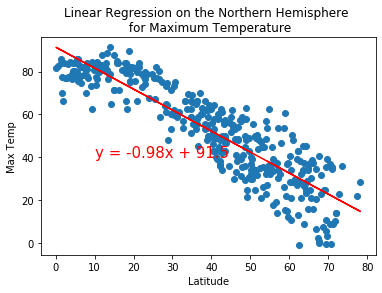

The r-value is: -0.897


In [23]:
#linear regression on the northern_hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#call regression function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

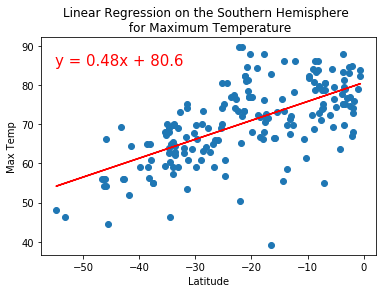

The r-value is: 0.640


In [24]:
#linear regression on the southern_hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#call regression function
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-55,85))

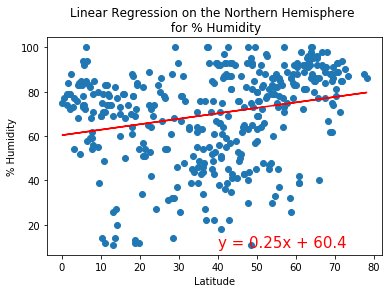

The r-value is: 0.241


In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

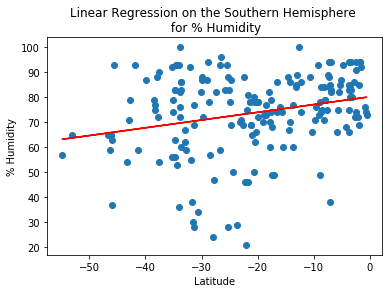

The r-value is: 0.254


In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-45,10))

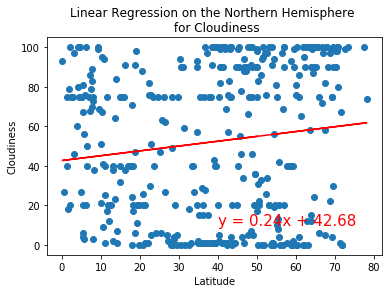

The r-value is: 0.131


In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Cloudiness', 'Cloudiness',(40,10))

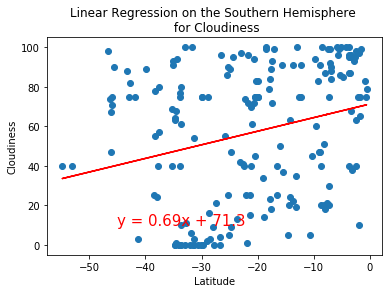

The r-value is: 0.264


In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Cloudiness', 'Cloudiness',(-45,10))

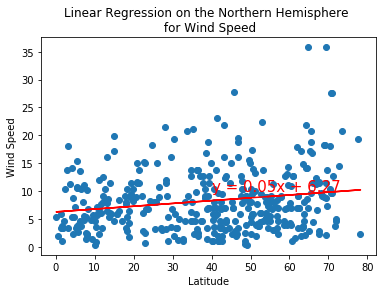

The r-value is: 0.186


In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,10))

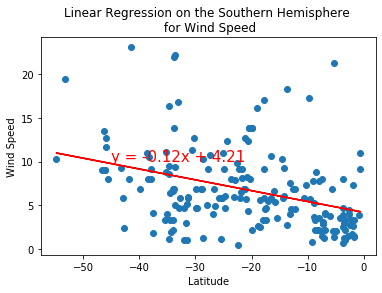

The r-value is: -0.355


In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-45,10))